## Introduzione

### Descrizione del Dataset

Il [dataset](https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified) si compone di 1885 occorrenze, una per ogni intervistato, relativamente alla frequenza di utilizzo delle 18 droghe (legali e non) proposte.
Sono inoltre presenti alcuni dati statistici relativi alla persona intervistata come età, sesso, nazionalità, etnia e diversi indici di personalità.

### Dipendenze

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Acquisizione Dati

In [17]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('drug_consumption.data', header=None)
drugs_labels = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
                'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']
data.columns = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS' ] + drugs_labels

Di seguito è mostrata la struttura del dataset

In [18]:
data

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

### Pre-processing dei dati

#### Valori duplicati

Il dataset non presenta record duplicati, il che è confermato dal codice di seguito il quale mostra che, dopo aver rimosso eventuali record duplicati, abbiamo sempre 1885 occorrenze.

In [5]:
#check duplicate records
data.drop_duplicates().count()

ID           1885
Age          1885
Gender       1885
Education    1885
Country      1885
Ethnicity    1885
Nscore       1885
Escore       1885
Oscore       1885
Ascore       1885
Cscore       1885
Impulsive    1885
SS           1885
Alcohol      1885
Amphet       1885
Amyl         1885
Benzos       1885
Caff         1885
Cannabis     1885
Choc         1885
Coke         1885
Crack        1885
Ecstasy      1885
Heroin       1885
Ketamine     1885
Legalh       1885
LSD          1885
Meth         1885
Mushrooms    1885
Nicotine     1885
Semer        1885
VSA          1885
dtype: int64

#### Valori mancanti

Il dataset non ha nemmeno valori mancanti, come mostrato dal codice seguente

In [6]:
#check NA
data.isna().sum().sum()

0

#### Rimozione dati non attendibili

"Semer" è una droga fittizia, introdotta per scovare eventuali utenti disonesti.
Il seguente codice rimuove tutti i record in cui l'intervistato sostiene di far uso di questa droga inesistente

In [22]:
data = data[data['Semer'] == 'CL0']
len(data)

1877

Rimuoviamo la colonna relativa alla droga fittizia

In [23]:
data = data.drop('Semer', axis=1)
drugs_labels.remove('Semer')

#### Mappatura classi

Le classi relativi alla frequenza di utilizzo delle droghe sono valorizzate da 7 classi:
|  Value  |    Description   |
|---------|-------------------------|
|   CL0   |       Never Used        |
|   CL1   |  Used over a Decade Ago |
|   CL2   |    Used in Last Decade  |
|   CL3   |     Used in Last Year   | 
|   CL4   |     Used in Last Month  | 
|   CL5   |     Used in Last Week   | 
|   CL6   |     Used in Last Day    |

Dato che gli algoritmi lavorano meglio con i numeri interi piuttosto che con le stringhe, rimuoviamo la parte iniziale del valore

In [24]:
#convert classes into integer
data[drugs_labels] = data[drugs_labels].apply(lambda c: c.map(lambda x: int(x.lstrip('CL'))), axis=1)

### Esplorazione statistica

In [25]:
data.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
count,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000
mean,943.079915,0.037577,-0.000771,-0.000984,0.358984,-0.309728,-0.000551,-0.001951,-0.003224,-0.000657,-0.000394,0.005293,-0.007408,4.637720,1.337773,0.606819,1.461907,5.484283,2.980288,5.109750,1.156633,0.295685,1.309536,0.372403,0.564198,1.353223,1.053277,0.826319,1.177944,3.194992,0.429409
std,544.601919,0.878387,0.482588,0.949831,0.699707,0.166220,0.998442,0.997418,0.995691,0.996689,0.997657,0.954148,0.962074,1.328234,1.782384,1.064005,1.869193,1.115119,2.286778,1.085716,1.510791,0.835925,1.647373,1.034761,1.216341,1.790881,1.484582,1.648379,1.459212,2.415814,0.959160
min,1.000000,-0.951970,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.000000,-0.951970,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,4.000000,0.000000,0.000000,0.000000,5.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,944.000000,-0.078540,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,5.000000,0.000000,0.000000,0.000000,6.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,1413.000000,0.497880,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400,6.000000,2.000000,1.000000,3.000000,6.000000,5.000000,6.000000,2.000000,0.000000,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,6.000000,0.000000
max,1888.000000,2.591710,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


### Esplorazione visuale

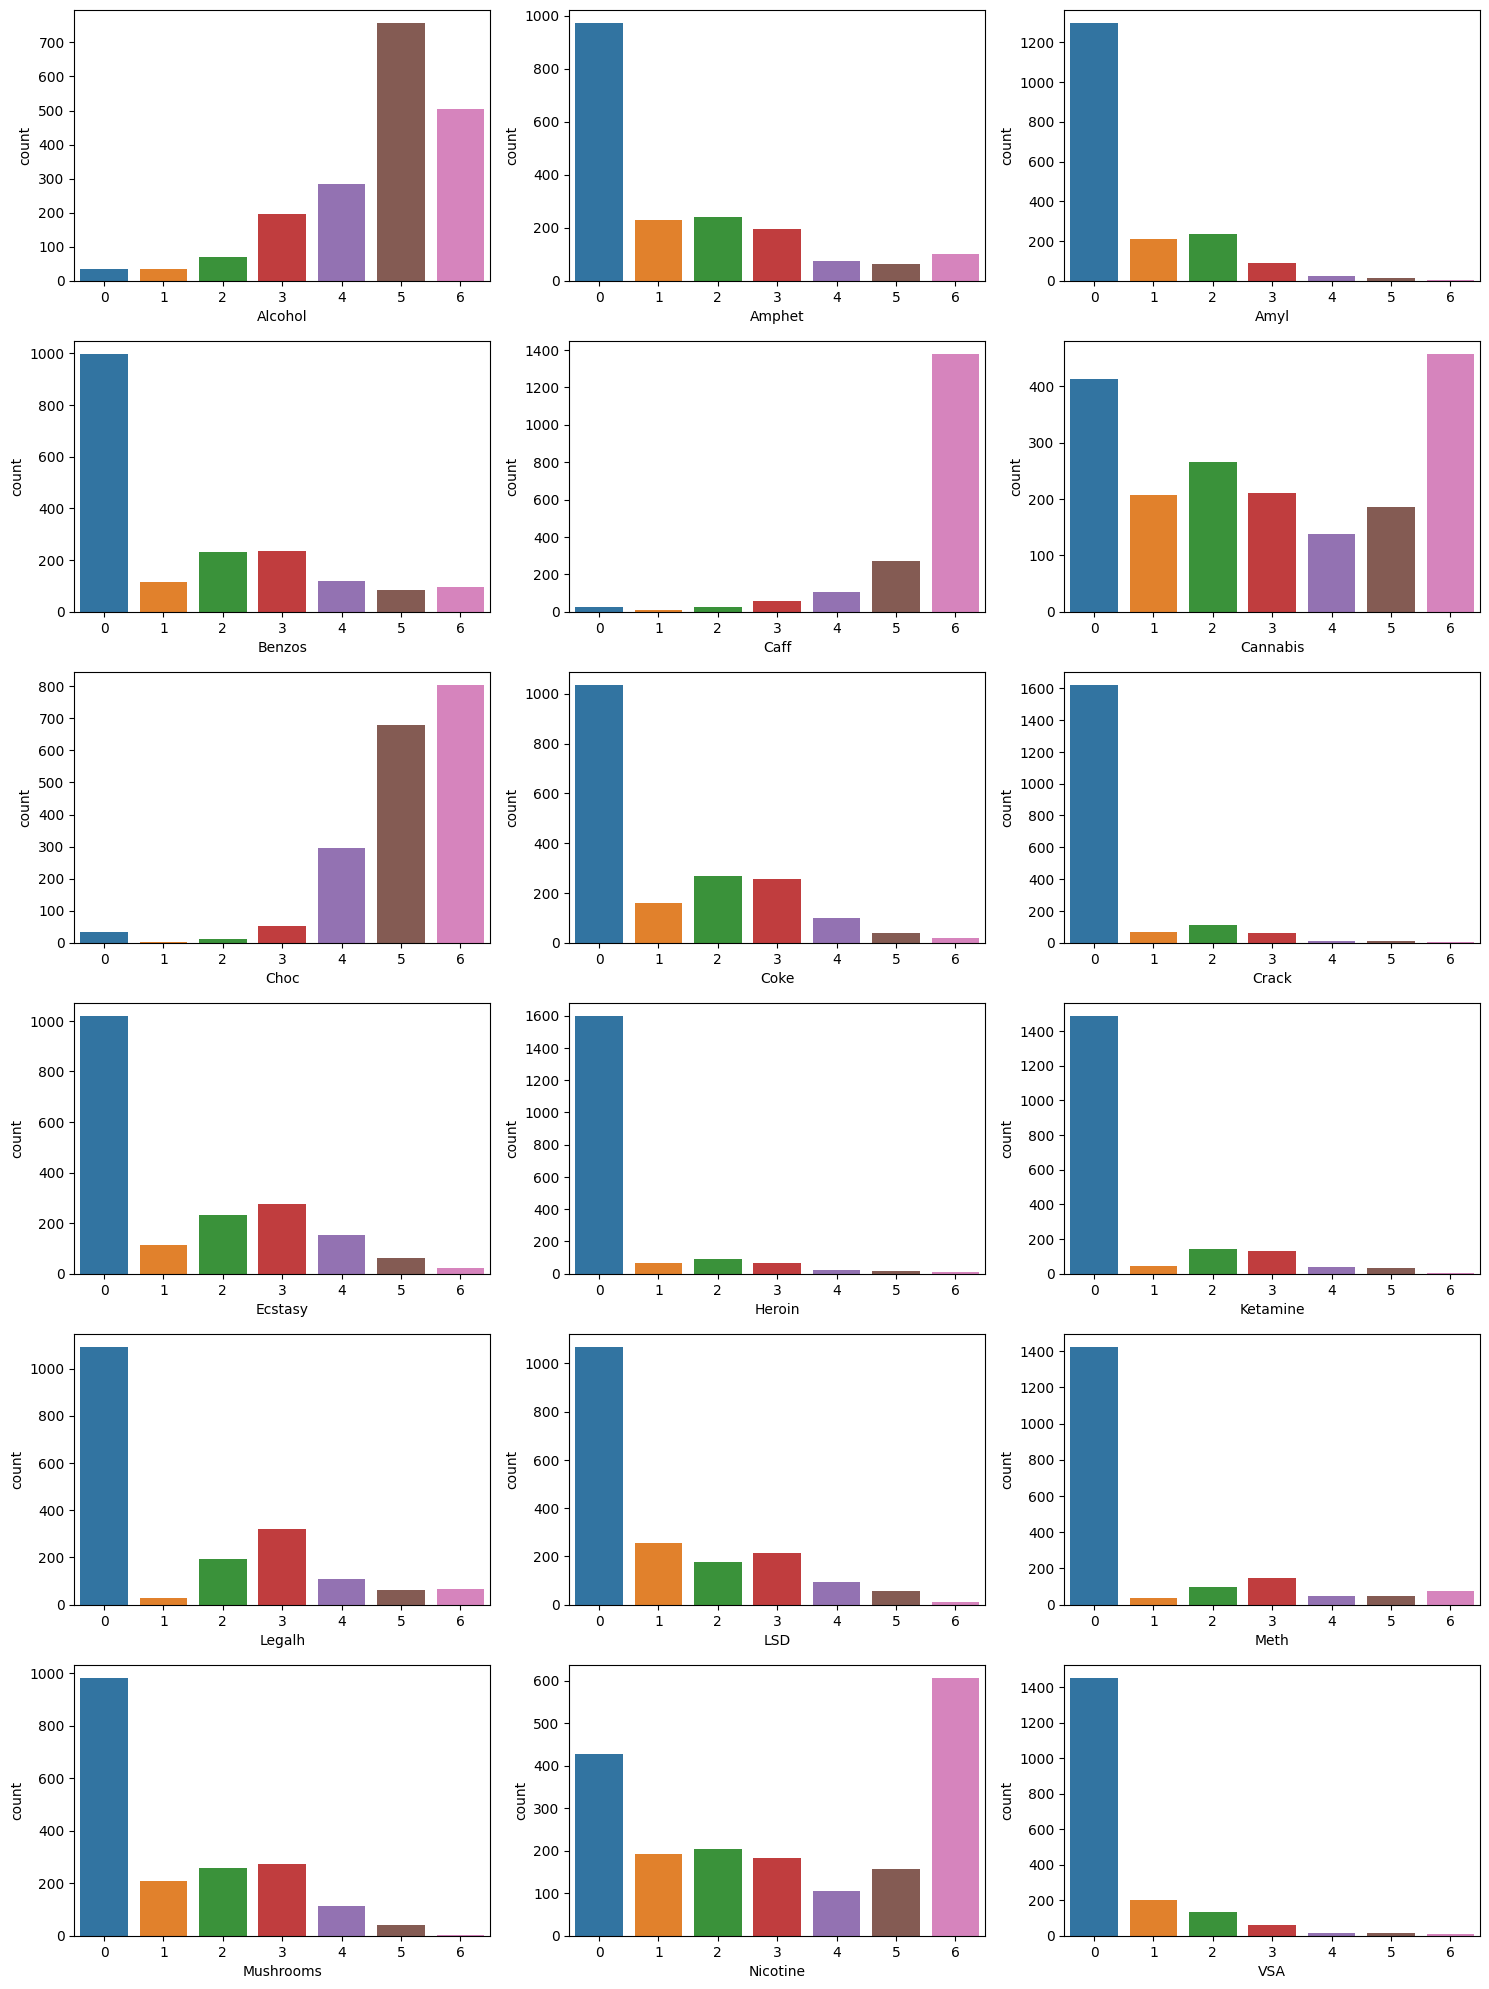

In [34]:
fig, axes = plt.subplots(6, 3, figsize = (15,20))

df = data.drop((x for x in data.columns if x not in drugs_labels), axis=1)

l = 0
for i in range(6):
    for j in range(3):
        sns.countplot(x=drugs_labels[l], data=df, ax=axes[i][j])
        l = l+1

plt.tight_layout()
plt.show()

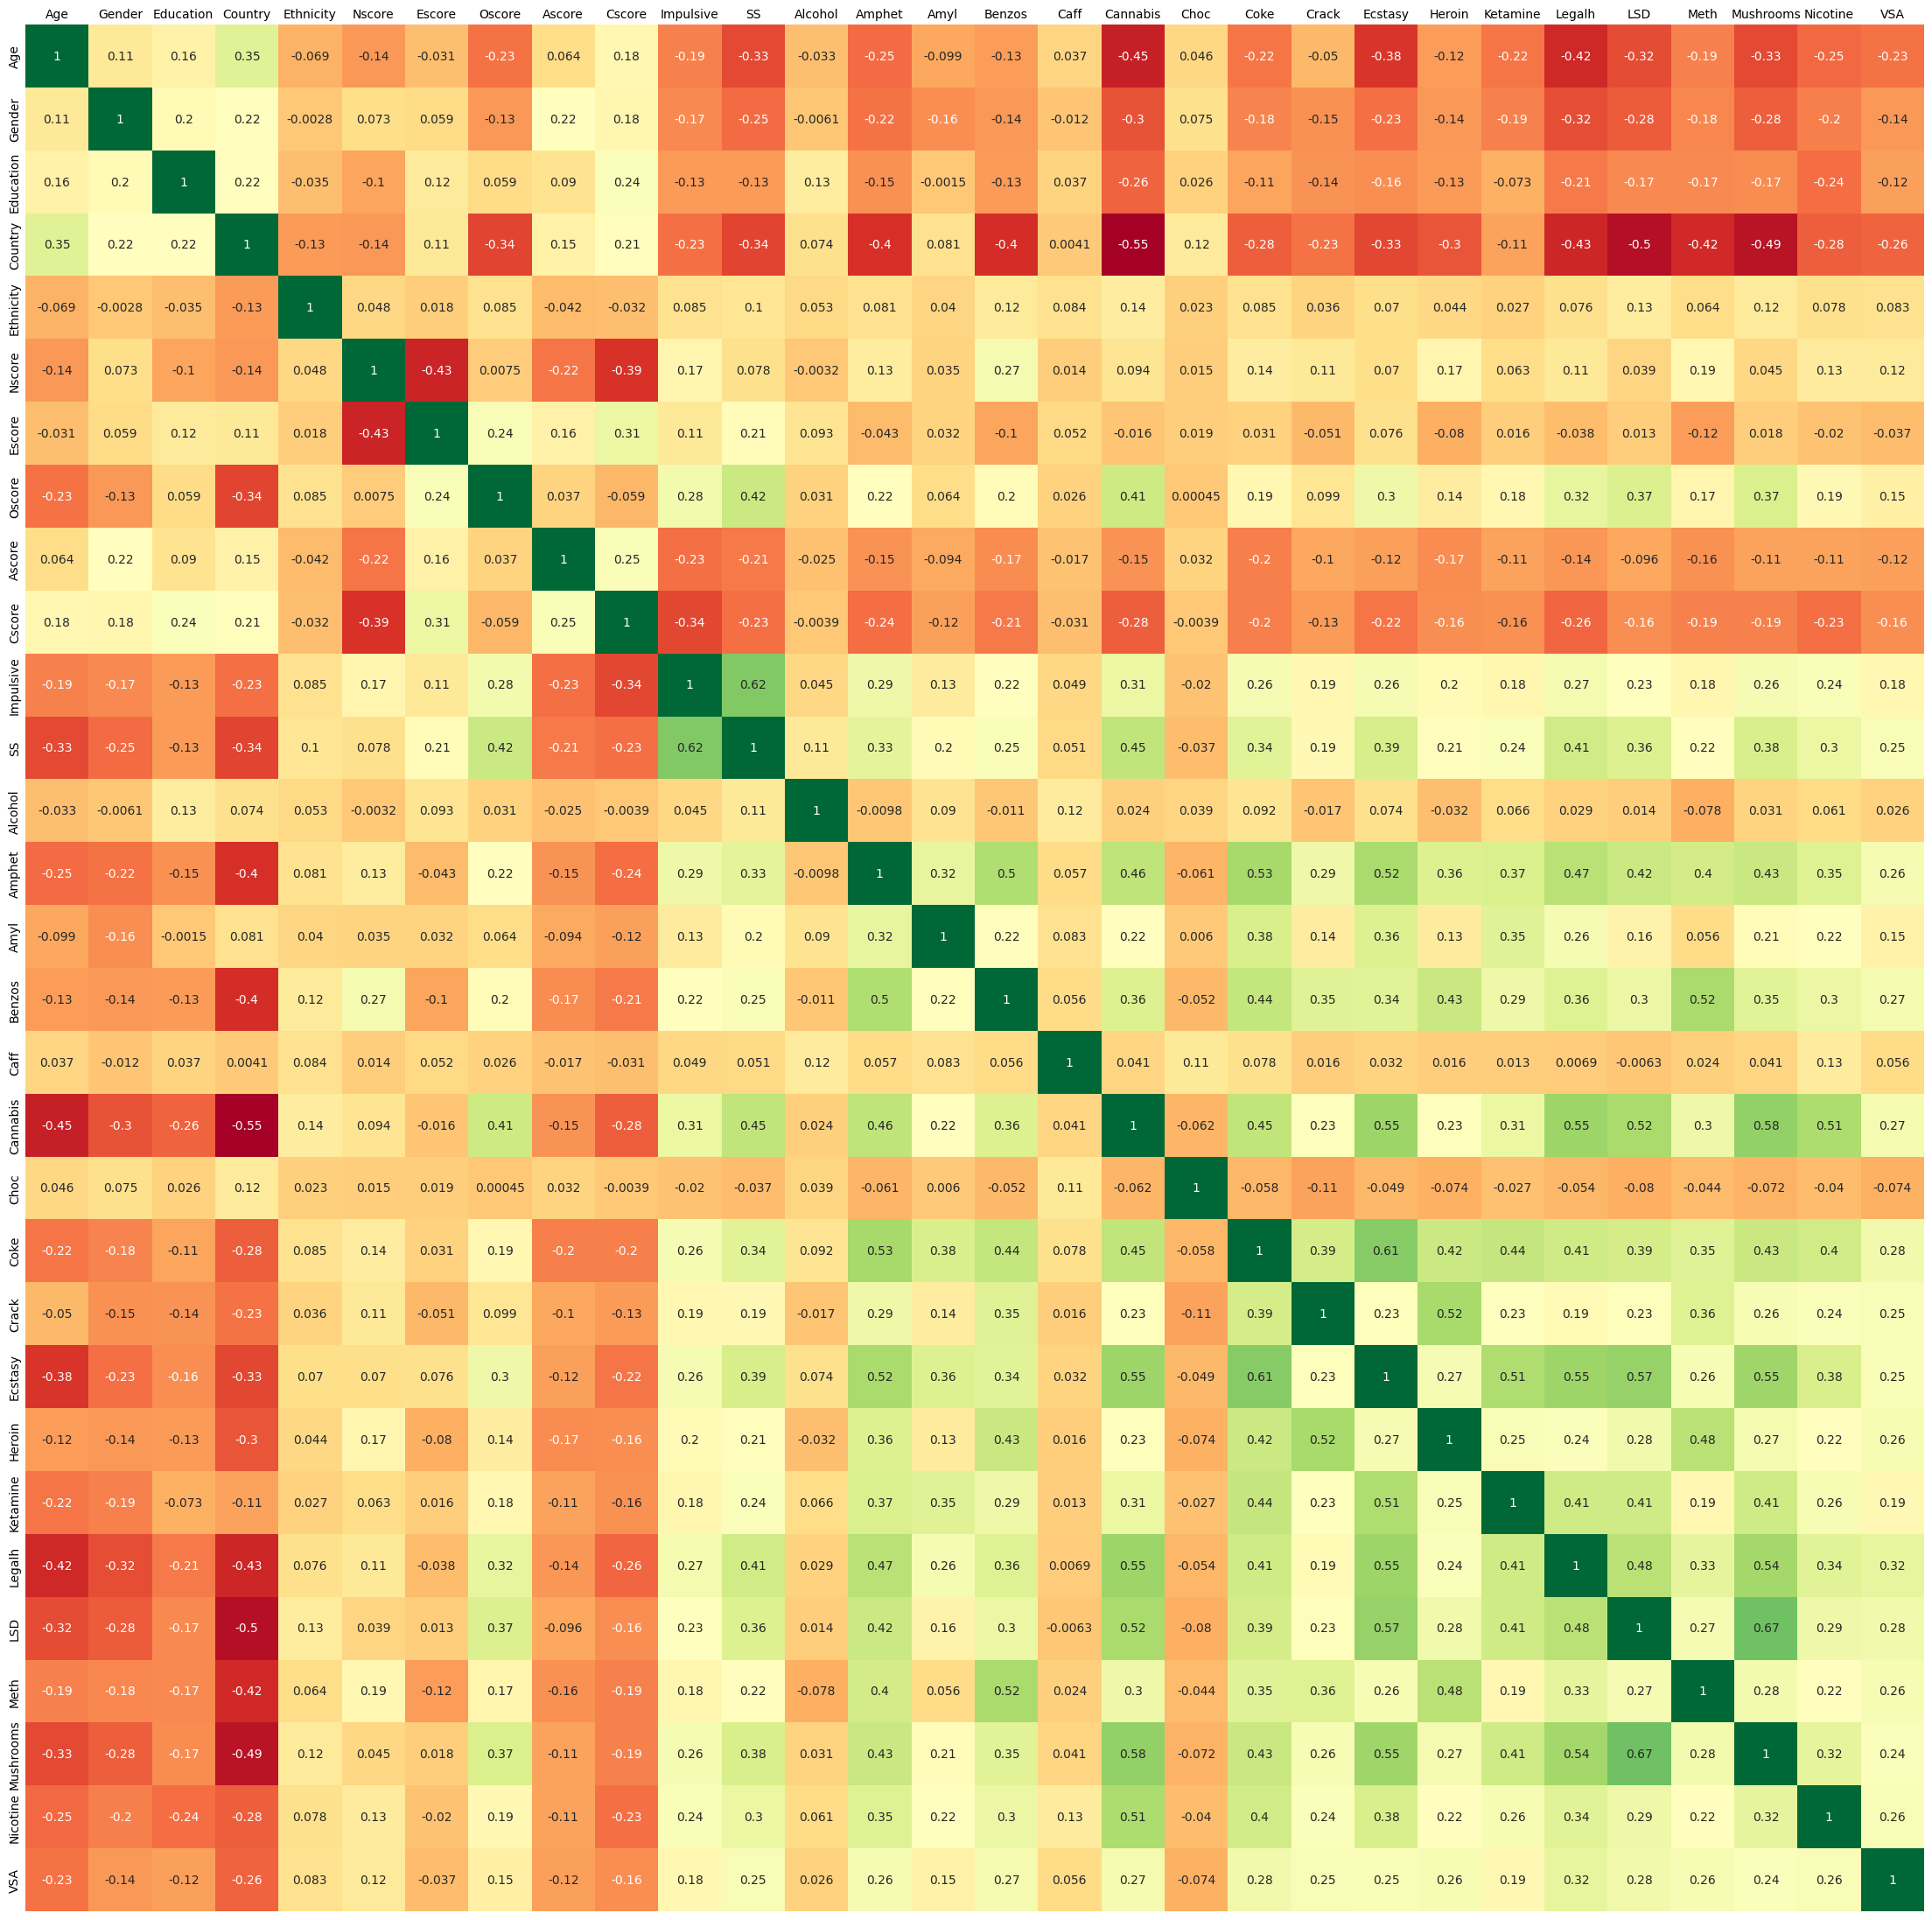

In [35]:
f, ax = plt.subplots(figsize=(28, 28))

sns.heatmap(data.drop('ID', axis=1).corr(), cmap = 'RdYlGn', annot=True, cbar=False)
ax.tick_params(length=0)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.show()

### Formulazione domande di analisi

- dai dati sulla persona e personalità, capire il rischio di essere utilizzatori o meno di quella droga (e anche la frequenza?) 
    - prendere tutti i dati insieme per ogni droga oppure solo alcuni indicatori per volta?
- quantità di droghe consumate in base ai dati sulla persona e personalità
- correlazione tra droghe (vedi heatmap sopra)
- tendenza uso droghe, alcune sembrano non essere praticamente più utilizzate di recente 

### Regressione

### Classificazione

### Clustering

### Conclusioni